<a href="https://colab.research.google.com/github/swee-27/Aiml-project-Emotion-Detection/blob/main/Emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib


In [ ]:
import pandas as pd

# Update the path if needed
train = pd.read_csv("train.txt", sep=';', names=["text", "label"])
test = pd.read_csv("test.txt", sep=';', names=["text", "label"])
val = pd.read_csv("val.txt", sep=';', names=["text", "label"])

print(train.head())
print(train['label'].value_counts())


                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
label
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


In [ ]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = text.replace('\n', '')
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

train['text'] = train['text'].apply(clean_text)
test['text'] = test['text'].apply(clean_text)
val['text'] = val['text'].apply(clean_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(train['text'])
X_test = tfidf.transform(test['text'])
X_val = tfidf.transform(val['text'])

y_train = train['label']
y_test = test['label']
y_val = val['label']


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.869
              precision    recall  f1-score   support

       anger       0.90      0.82      0.86       275
        fear       0.89      0.80      0.84       224
         joy       0.84      0.96      0.89       695
        love       0.83      0.60      0.69       159
     sadness       0.90      0.93      0.91       581
    surprise       0.85      0.52      0.64        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.86      2000



In [ ]:
sample = ["I am very sad and depressed", "This is awesome!"]
sample_tfidf = tfidf.transform(sample)
print(model.predict(sample_tfidf))


['sadness' 'joy']


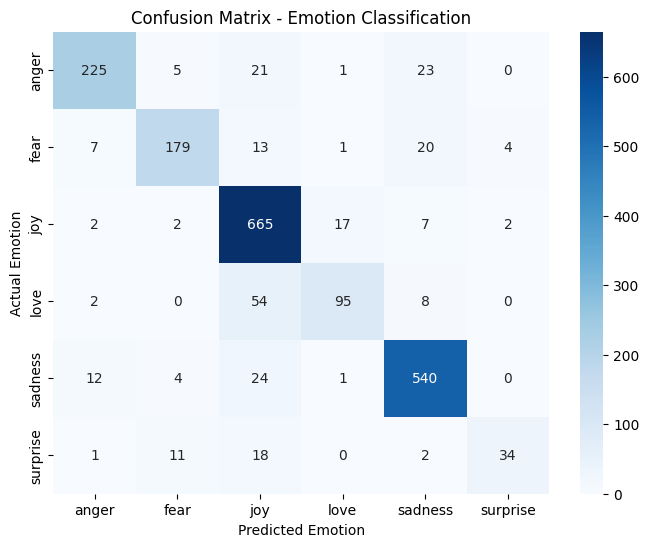

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=model.classes_,
            yticklabels=model.classes_,
            cmap="Blues")
plt.title("Confusion Matrix - Emotion Classification")
plt.xlabel("Predicted Emotion")
plt.ylabel("Actual Emotion")
plt.show()


In [ ]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 99.9 MB/s eta 0:00:00


In [ ]:
import pickle

# Save model
with open("emotion_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save TF-IDF
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)


In [ ]:
!pip install pyngrok

In [ ]:
%%writefile app.py
import streamlit as st
import pickle

model = pickle.load(open("emotion_model.pkl", "rb"))
tfidf = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

st.title("💬 Emotion Detection App")
st.write("Enter a sentence to detect the emotion")

text = st.text_input("Enter text:")

if st.button("Predict"):
    if text.strip():
        x = tfidf.transform([text])
        prediction = model.predict(x)[0]
        st.success(f"Emotion: {prediction.upper()}")
    else:
        st.warning("Please enter a sentence.")


Writing app.py


In [ ]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 2s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import pickle

model = pickle.load(open("emotion_model.pkl", "rb"))
tfidf = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

st.title("💬 Emotion Detection App")
text = st.text_input("Enter text to analyze:")

if st.button("Predict Emotion"):
    if text.strip():
        vec = tfidf.transform([text])
        pred = model.predict(vec)[0]
        st.success(f"Emotion: **{pred.upper()}**")
    else:
        st.warning("Please type something!")


Overwriting app.py


In [ ]:
!nohup streamlit run app.py --server.port 8501 &> streamlit.log &

In [ ]:
from google.colab import files
files.download("emotion_model.pkl")
files.download("tfidf_vectorizer.pkl")
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>